In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)
import tools4PytChem as t4p

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/home/vfornemo/PytChem/PytChem


**Start at:** Saturday 23 September 2023, 21:21:19  
**Hostname:** Winnie-virtual-machine (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/PytChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

# Hydrogen Atom

## Introduction

<div class="intro">

The Schrödinger equation allows one to calculate the stationary states and also the time evolution of quantum systems. Exact analytical answers are available for the nonrelativistic hydrogen atom. In short, the time-independent Schrödinger Equation for the hydrogen atom is conveniently written and solved in spherical coordinates:

$$\hat{H}(r,\theta,\varphi)\psi(r,\theta,\varphi)=E\psi(r,\theta,\varphi)$$

with $\hat{H}=\hat{T}+\hat{V}$, where

$$\hat{V} = -\frac{e^{2}}{4\pi\varepsilon_{0}}\frac{1}{r}$$

is the position-dependent potential of the electron "cruising" under the influence of the proton, and

$$ \hat{T}=-\frac{\hbar^{2}}{2\mu_\mathrm{H}}\nabla^{2} $$

with

$$\nabla^{2}=\frac{1}{r^{2}}\left[\frac{\partial}{\partial r}\left(r^{2}\frac{\partial}{\partial r}\right)+\Lambda^{2}\right]$$

$\mu_\mathrm{H}$ is the reduced mass for the electron: $\mu_\mathrm{H} = m_e m_p / (m_e+m_p)$

and $\Lambda^2$ is the Legendre operator:

$$\Lambda^{2}=\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^{2}\theta}\frac{\partial^{2}}{\partial\varphi^{2}}$$

It can be demonstrated that $\psi(r,\theta,\varphi)$ is a product wavefunction, made of a radial part $R_{n\ell}(r)$ and an angular part, the spherical harmonic $Y_\ell^m(\theta,\varphi)$ functions.

$Y_\ell^m(\theta,\varphi)$ are the normalized eigenvectors of the $\Lambda^2$ operator:

$$\Lambda^{2}Y_\ell^m(\theta,\varphi)=-l(l+1)Y_\ell^m(\theta,\varphi)$$

and $R_{n\ell}(r)$ are solution of a radial equation, which eigenvalue is the energy for the hydrogen atom:

$$\left(-\frac{\hbar^{2}}{2\mu}\left[\frac{1}{r^{2}}\frac{\partial}{\partial r}\left(r^{2}\frac{\partial}{\partial r}\right)-\frac{l(l+1)}{r^{2}}\right]-\frac{e^{2}}{4\pi\varepsilon_{0}}\frac{1}{r}\right)R_{n\ell}(r)=E_{n}R_{n\ell}(r)$$

</div>
<br>

<div class="rqT" title="In summary">

Any $\psi_{n\ell m}(r,\theta,\varphi)=R_{n\ell}(r)Y_\ell^m(\theta,\varphi)$ wavefunction is an eigensolution of $\hat{H}(r,\theta,\varphi)\psi_{n\ell m}(r,\theta,\varphi)=E_n\psi_{n\ell m}(r,\theta,\varphi)$, with

$$\hat{H}=-\frac{\hbar^{2}}{2\mu_\mathrm{H}}\nabla^{2}-\frac{e^{2}}{4\pi\varepsilon_{0}}\frac{1}{r}$$

$$\hat{H}=-\frac{\hbar^{2}}{2\mu_\mathrm{H}}\frac{1}{r^{2}}\left[\frac{\partial}{\partial r}\left(r^{2}\frac{\partial}{\partial r}\right)+\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^{2}\theta}\frac{\partial^{2}}{\partial\varphi^{2}}\right]-\frac{e^{2}}{4\pi\varepsilon_{0}}\frac{1}{r}$$

</div>

## Prerequisite : physical constants and conversion factors

### Physical constants and unit conversion factors

<div class="rqT" title="Directives">
    
- It is recommended to use the [physical constants of the SciPy library](https://docs.scipy.org/doc/scipy/reference/constants.html) instead of a copy/paste of values found on internet.
- You are allowed to directly perform numerical calculations, unless the use of SymPy is explicitly required
</div>

In [2]:
import scipy.constants as sc
import numpy as np

print(sc.find("Planck"))
print(f'{hl.BOLD}Planck constant: {sc.physical_constants["Planck constant"]}{hl.OFF}')
print(f'{hl.BOLD}Reduced Planck constant: {sc.physical_constants["reduced Planck constant"]}{hl.OFF}')
print(sc.find("charge"))
print(f'{hl.BOLD}Elementary charge: {sc.physical_constants["elementary charge"]}{hl.OFF}')
print(sc.find("light"))
print(f'{hl.BOLD}speed of light in vacuum: {sc.physical_constants["speed of light in vacuum"]}{hl.OFF}')
print(sc.find("electron mass"))
print(f'{hl.BOLD}Electron mass: {sc.physical_constants["electron mass"]}{hl.OFF}')
print(sc.find("proton mass"))
print(f'{hl.BOLD}Proton mass: {sc.physical_constants["proton mass"]}{hl.OFF}')
print(sc.find("vacuum"))
print(f'{hl.BOLD}Vacuum electric permittivity: {sc.physical_constants["vacuum electric permittivity"]}{hl.OFF}')

h = sc.value("Planck constant")
hbar = sc.value("reduced Planck constant")
e = sc.value("elementary charge")
c = sc.value("speed of light in vacuum")
me = sc.value("electron mass")
mp = sc.value("proton mass")
eps0 = sc.value("vacuum electric permittivity")

['Planck constant', 'Planck constant in eV/Hz', 'Planck length', 'Planck mass', 'Planck mass energy equivalent in GeV', 'Planck temperature', 'Planck time', 'molar Planck constant', 'reduced Planck constant', 'reduced Planck constant in eV s', 'reduced Planck constant times c in MeV fm']
Planck constant: (6.62607015e-34, 'J Hz^-1', 0.0)
Reduced Planck constant: (1.054571817e-34, 'J s', 0.0)
['atomic unit of charge', 'atomic unit of charge density', 'deuteron rms charge radius', 'electron charge to mass quotient', 'elementary charge', 'elementary charge over h-bar', 'proton charge to mass quotient', 'proton rms charge radius']
Elementary charge: (1.602176634e-19, 'C', 0.0)
['speed of light in vacuum']
speed of light in vacuum: (299792458.0, 'm s^-1', 0.0)
['alpha particle-electron mass ratio', 'deuteron-electron mass ratio', 'electron mass', 'electron mass energy equivalent', 'electron mass energy equivalent in MeV', 'electron mass in u', 'helion-electron mass ratio', 'muon-electron mas

<div class="exE">

- find in the `scipy.constants` module the value of the Rydberg constant $R_\infty$, as well as its standard uncertainty and its unit
- save $R_\infty$ in an `Rinf` python variable and the absolute uncertainty in an `Rinf_err` python variable
- use a formatted print in order to write `Rinf = 10973731.568160 ± 0.000021`
</div>

In [3]:
# Find the value of Rydberg constant, standard uncertainty and unit
dic = sc.physical_constants["Rydberg constant"]
print(f'{hl.BOLD}Rydberg constant: {dic}{hl.OFF}')

# Save the values
(Rinf, Rinf_err) = dic[0], dic[2]


# Formatted output
print(f'Rinf = {Rinf: .6f} ±{Rinf_err: .6f}')





Rydberg constant: (10973731.56816, 'm^-1', 2.1e-05)
Rinf =  10973731.568160 ± 0.000021


### Conversion factors

<div class="intro">

It is convenient to work in the Hartree atomic units system. It is a system of natural units of measurement which is especially convenient for calculations in atomic physics and related scientific fields, such as computational chemistry and atomic and molecular spectroscopy. The hartree (symbol: E<sub>h</sub> or Ha), also known as the Hartree energy, is the unit of energy in the Hartree atomic units system. The hartree energy is approximately the electric potential energy of the hydrogen atom in its ground state and, by the virial theorem, approximately twice its ionization energy; the relationships are not exact because of the finite mass of the nucleus of the hydrogen atom and relativistic corrections. 

$E_h$ can be calculated in different ways:

$$E_h = \frac{e^2}{4\pi\varepsilon_0 a_0} = m_e\left(\frac{e^2}{4\pi\varepsilon_0 a_0 \hbar}\right)^2=2R_\infty hc$$

In 2023, its [CODATA](https://en.wikipedia.org/wiki/Committee_on_Data_of_the_International_Science_Council) recommended value is: 1 *E<sub>h</sub>* = 4.359 744 722 2071(85) x 10<sup>-18</sup> J = 27.211 386 245 988(53) eV    

</div>

<div class="exE">

- calculate $E_h$ in J and in eV
    - using the formula $E_h = 2R_\infty hc$
    - and then with the formula $E_h = \frac{e^2}{4\pi\varepsilon_0 a_0}$
- store the eV value in an `h2eV` python variable, that will be used in the "Energy and transitions" exercises
</div>

In [4]:
# Calculate E_h
# Using E_h = 2*R_inf*h*c
Eh = 2*Rinf*h*c # J
print("Eh = ",Eh,"J")
h2eV = Eh/e
print("h2eV = ",h2eV,"eV")

# Using Eh = e^2/(4*\pi*\epsilon_0*a_0) and store
pi = np.pi
a0 = sc.value("Bohr radius")
Eh = e**2/(4*pi*eps0*a0)
print("Eh = ",Eh,"J")
h2eV = Eh/e
print("h2eV = ",h2eV,"eV")





Eh =  4.359744722207169e-18 J
h2eV =  27.211386245988464 eV
Eh =  4.3597447221978555e-18 J
h2eV =  27.211386245930335 eV


### Propagation of uncertainties

<div class="intro">

**[In statistics, propagation of uncertainty (or propagation of error) is the effect of variables' uncertainties or errors on the uncertainty of a function based on them](https://en.wikipedia.org/wiki/Propagation_of_uncertainty).**

**Suppose two measured quantities $x$ and $y$ have uncertainties, $u_x$ and $u_y$: we would report ($x \pm u_x$), and ($y \pm u_y$). Suppose also that a new quantity, $z$, is calculated from $x$ and $y$. What is the uncertainty, $u_z$, in $z$?**

More generally, Let's $f(x_1,x_2,..., x_n)$ be a function of $n$ variables $x_1,x_2,..., x_n$. Most commonly, the uncertainty $u_i$ on each variable $x_i$ is quantified in terms of the standard deviation, $\sigma_i$. The general method of getting formulas for propagating errors involves the **total differential of a function**. It is a calculus derived statistical calculation designed to combine uncertainties from multiple variables to provide an accurate measurement of uncertainty. The next formula provides the maximal uncertainty on $f$, $u_f$. It is the most pessimistic situation, that gives us the **safe limit** of our estimate

$$u_{f}=\sum_{i=1}^{n}\left|\frac{\partial f}{\partial x_{i}}\right|u_{i}$$

In the proper statistical treatment of error propagation the standard deviations $\sigma_i$ are used to calculate the resulting uncertainty. Neglecting correlations or assuming independent variables yields a common formula among engineers and experimental scientists to calculate error propagation, named the **variance formula**, and considered to be more realistic . 

$$\sigma_{f}=\sqrt{\sum_{i=1}^{n}\left(\frac{\partial f}{\partial x_{i}}\right)^{2}\sigma_{i}^{2}}$$
</div>

<div class="exE">

We will now calculate the uncertainty on $E_h$. Given the 2023 CODATA value, it is said to be 0.000 000 000 0085 $\times$ 10<sup>-18</sup> J, *i.e.* 8.5 $\times$ 10<sup>-30</sup> J. Calculate $u_{E_h}$ and $\sigma_{E_h}$ from the formula $E_h = \frac{e^2}{4\pi\varepsilon_0 a_0}$

</div>
<br>
<div class="rqT" title="Directives">
    
The partial derivatives will be calculated with SymPy, whereas physical constants and their standard uncertainties will be taken from SciPy.
</div>

In [5]:
# Calculate u_Eh

import math
import sympy as sym

# Store each standard uncertainty
# Because the uncertainties of the e and pi are 0, we only take them of eps0, a0, e
a0_err = sc.physical_constants["Bohr radius"][2]
e_err = sc.physical_constants["elementary charge"][2]
eps0_err = sc.physical_constants["vacuum electric permittivity"][2]

# Calculate derivatives with SymPy
eps0_sym, e_sym, a0_sym = sym.symbols("epsilon_0 e a_0")
Eh_func1 = e_sym**2/(4*sym.pi*a0_sym*eps0_sym)
Eh_func1
e_diff = sym.diff(Eh_func1, e_sym)
e_diff
eps0_diff = sym.diff(Eh_func1, eps0_sym)
eps0_diff
a0_diff = sym.diff(Eh_func1, a0_sym)
a0_diff

# Lambdification
e_lam = sym.lambdify([eps0_sym, a0_sym, e_sym],e_diff)
eps0_lam = sym.lambdify([eps0_sym, a0_sym, e_sym],eps0_diff)
a0_lam = sym.lambdify([eps0_sym, a0_sym, e_sym],a0_diff)

# Calculate u_Eh
u_Eh = abs(e_lam(eps0, a0, e))*e_err + abs(eps0_lam(eps0, a0, e))*eps0_err + abs(a0_lam(eps0, a0, e))*a0_err
print("u_Eh = ", u_Eh)

# NOT CORRECT!!

# Calculate sigma_Eh
sigma_Eh = e_lam(eps0, a0, e)**2*e_err**2 + eps0_lam(eps0, a0, e)**2*eps0_err**2 + a0_lam(eps0, a0, e)**2*a0_err**2
simga_Eh = math.sqrt(sigma_Eh)
print("sigma_Eh = ", sigma_Eh)

# NOT CORRECT!!



e**2/(4*pi*a_0*epsilon_0)

e/(2*pi*a_0*epsilon_0)

-e**2/(4*pi*a_0*epsilon_0**2)

-e**2/(4*pi*a_0**2*epsilon_0)

u_Eh =  1.2992094585475788e-27
sigma_Eh =  8.441528484058106e-55


<div class="exE">

Do the same with the formula $E_h = 2R_\infty hc$

</div>

In [6]:
# Store each standard uncertainty
h_err = sc.physical_constants["Planck constant"][2]
c_err = sc.physical_constants["speed of light in vacuum"][2]

# Since the partial derivatives is easy to get, we just calculate u_Eh and sigma_Eh directly
u_Eh = abs(2*h*c*Rinf_err) + abs(2*Rinf*h*c_err) + abs(2*Rinf*c*h_err)
print("u_Eh = ", u_Eh)
sigma_Eh = (2*h*c*Rinf_err)**2 + (2*Rinf*h*c_err)**2 + (2*Rinf*c*h_err)**2
simga_Eh = math.sqrt(sigma_Eh)
print("sigma_Eh = ", sigma_Eh)



u_Eh =  8.3430726000255e-30
sigma_Eh =  6.960686040929625e-59


<div class="exE">

Comments?

</div>

##  Energies and transitions

<div class="intro">

The solutions to the Schrödinger equation for hydrogen are analytical, giving a simple expression for the hydrogen energy levels:

$$E_n = - \frac{E_{i_1}}{n^2}$$

where


$$E_{i_{1}}=\frac{1}{2}\frac{\mu_{\mathrm{H}}e^{4}}{\left(\hbar\times4\pi\varepsilon_{0}\right)^{2}}$$

is the ionization energy for the hydrogen atom

</div>

### Ionisation energy

<div class="exE">

- Calculate the hydrogen atom reduced mass, $\mu_\mathrm{H}$, in kg.
- Calculate the ionization energy of the hydrogen atom, in Joule and in eV.
- Print the eV value with 5 significant digits.
</div>

In [7]:
# Reduced mass

mu = mp*me/(mp+me)
print(f"mu_H = {mu}kg")

# Ionization energy
Ei = (mu*e**4)/(2*(hbar*4*pi*eps0)**2)
print(f"Ei = {Ei}J") # in J
Ei = Ei/e # in eV

# print with 5 significant digits
print(f"Ei = {Ei:.5g}eV") # in eV


# previous version
# Construct reduced mass equation
# mp_sym, me_sym = sym.symbols("m_p m_e")
# mu_sym = mp_sym*me_sym/(mp_sym+me_sym)
# mu_sym

# # Lambdification and calculate
# mu_lam = sym.lambdify([me_sym, mp_sym],mu_sym)
# mu = mu_lam(me,mp)
# mu

# Construct ionization energy equation
# hbar_sym, mu_sym = sym.symbols("hbar mu_H")
# Ei_sym = (mu_sym*e_sym**4)/(2*(hbar_sym*4*sym.pi*eps0_sym)**2)
# Ei_sym

# # Lambdification and calculate
# Ei_lam = sym.lambdify([mu_sym, e_sym, hbar_sym, eps0_sym],Ei_sym)
# Ei = Ei_lam(mu, e, hbar, eps0)
# print("Ei =", Ei, "J") # in J



mu_H = 9.104425276523571e-31kg
Ei = 2.17868581437854e-18J
Ei = 13.598eV


### Energy levels

<div class="exE">

Use a loop to calculate and print energies in eV and in Eh of states $n=1 \rightarrow n=10$
</div>

<br>
<div class="rqT" title="Directive">
    
Print the hartree and eV energies with 3 significant figures.
Also display them with 5 significant figures. **Comment?**
</div>

In [8]:
# This time we calculate directly instead of constructing equations
Enn = [] # Collections of energies of state n = 1 -> 10 
for i in range(10):
    print(f"n = {i+1}")
    En = -Ei/((i+1)**2) # in eV
    Enh = En / h2eV  # in Ha
    Enn.append(En)
    print(f"E{i+1} = {En:#.3g}eV = {Enh:#.3g}Ha") # 3 significant digits in eV/Ha
    print(f"E{i+1} = {En:#.5g}eV = {Enh:#.5g}Ha") # 5 significant digits in eV/Ha
# g is a formatting specifer, and # provides the alternate form which does not trim 0


n = 1
E1 = -13.6eV = -0.500Ha
E1 = -13.598eV = -0.49973Ha
n = 2
E2 = -3.40eV = -0.125Ha
E2 = -3.3996eV = -0.12493Ha
n = 3
E3 = -1.51eV = -0.0555Ha
E3 = -1.5109eV = -0.055525Ha
n = 4
E4 = -0.850eV = -0.0312Ha
E4 = -0.84989eV = -0.031233Ha
n = 5
E5 = -0.544eV = -0.0200Ha
E5 = -0.54393eV = -0.019989Ha
n = 6
E6 = -0.378eV = -0.0139Ha
E6 = -0.37773eV = -0.013881Ha
n = 7
E7 = -0.278eV = -0.0102Ha
E7 = -0.27752eV = -0.010199Ha
n = 8
E8 = -0.212eV = -0.00781Ha
E8 = -0.21247eV = -0.0078082Ha
n = 9
E9 = -0.168eV = -0.00617Ha
E9 = -0.16788eV = -0.0061695Ha
n = 10
E10 = -0.136eV = -0.00500Ha
E10 = -0.13598eV = -0.0049973Ha


### Transition energies

<div class="exE">

- Calculate all transition energies (in eV) and transition wavelengths (in nm) of the [Lyman, Balmer, Paschen, Brackett, Pfund and Humphreys series](https://en.wikipedia.org/wiki/Hydrogen_spectral_series) in the range $n=1 \rightarrow n=10$
- Calculate as well the limit value for each series, in nm
</div>

In [9]:
# Lyman series
# electron from n' -> n=1, n' = 2, 3, ...
# E = h\nu = hc/\lambda -> \lambda = hc/E
print("Lyman series")
E1 = Enn[0] # Energy of n=1
for i in range(9):
    E_trans = Enn[i+1] - E1
    lam_trans = h*c / (E_trans*e)*1e9 # 1m = 1e9nm
    print(f"n = {i+2} -> 1, transition energy = {E_trans:#.5g}eV, wavelength = {lam_trans:#.5g}nm")
E_lim = -E1
lam_lim = h*c / (E_lim*e)*1e9 
print(f"n -> ∞ -> 1, limit wavelength = {lam_lim:#.5g}nm")
    

# Balmer series

print("Balmer series")
E2 = Enn[1] # Energy of n=1
for i in range(8):
    E_trans = Enn[i+2] - E2
    lam_trans = h*c / (E_trans*e)*1e9 # 1m = 1e9nm
    print(f"n = {i+3} -> 2, transition energy = {E_trans:#.5g}eV, wavelength = {lam_trans:#.5g}nm")
E_lim = -E2
lam_lim = h*c / (E_lim*e)*1e9 
print(f"n -> ∞ -> 2, limit wavelength = {lam_lim:#.5g}nm")


# Paschen series

print("Paschen series")
E3 = Enn[2] # Energy of n=1
for i in range(7):
    E_trans = Enn[i+3] - E3
    lam_trans = h*c / (E_trans*e)*1e9 # 1m = 1e9nm
    print(f"n = {i+4} -> 3, transition energy = {E_trans:#.5g}eV, wavelength = {lam_trans:#.5g}nm")
E_lim = -E3
lam_lim = h*c / (E_lim*e)*1e9 
print(f"n -> ∞ -> 3, limit wavelength = {lam_lim:#.5g}nm")


# Brackett series

print("Paschen series")
E4 = Enn[3] # Energy of n=1
for i in range(6):
    E_trans = Enn[i+4] - E4
    lam_trans = h*c / (E_trans*e)*1e9 # 1m = 1e9nm
    print(f"n = {i+5} -> 4, transition energy = {E_trans:#.5g}eV, wavelength = {lam_trans:#.5g}nm")
E_lim = -E4
lam_lim = h*c / (E_lim*e)*1e9 
print(f"n -> ∞ -> 4, limit wavelength = {lam_lim:#.5g}nm")


# Pfund series

print("Pfund series")
E5 = Enn[4] # Energy of n=1
for i in range(5):
    E_trans = Enn[i+5] - E5
    lam_trans = h*c / (E_trans*e)*1e9 # 1m = 1e9nm
    print(f"n = {i+5} -> 5, transition energy = {E_trans:#.5g}eV, wavelength = {lam_trans:#.5g}nm")
E_lim = -E5
lam_lim = h*c / (E_lim*e)*1e9 
print(f"n -> ∞ -> 5, limit wavelength = {lam_lim:#.5g}nm")

# Humphreys series

print("Humphreys series")
E6 = Enn[5] # Energy of n=1
for i in range(4):
    E_trans = Enn[i+6] - E6
    lam_trans = h*c / (E_trans*e)*1e9 # 1m = 1e9nm
    print(f"n = {i+5} -> 6, transition energy = {E_trans:#.5g}eV, wavelength = {lam_trans:#.5g}nm")
E_lim = -E6
lam_lim = h*c / (E_lim*e)*1e9 
print(f"n -> ∞ -> 6, limit wavelength = {lam_lim:#.5g}nm")





Lyman series
n = 2 -> 1, transition energy = 10.199eV, wavelength = 121.57nm
n = 3 -> 1, transition energy = 12.087eV, wavelength = 102.57nm
n = 4 -> 1, transition energy = 12.748eV, wavelength = 97.255nm
n = 5 -> 1, transition energy = 13.054eV, wavelength = 94.975nm
n = 6 -> 1, transition energy = 13.221eV, wavelength = 93.781nm
n = 7 -> 1, transition energy = 13.321eV, wavelength = 93.076nm
n = 8 -> 1, transition energy = 13.386eV, wavelength = 92.624nm
n = 9 -> 1, transition energy = 13.430eV, wavelength = 92.316nm
n = 10 -> 1, transition energy = 13.462eV, wavelength = 92.097nm
n -> ∞ -> 1, limit wavelength = 91.176nm
Balmer series
n = 3 -> 2, transition energy = 1.8887eV, wavelength = 656.47nm
n = 4 -> 2, transition energy = 2.5497eV, wavelength = 486.27nm
n = 5 -> 2, transition energy = 2.8556eV, wavelength = 434.17nm
n = 6 -> 2, transition energy = 3.0218eV, wavelength = 410.29nm
n = 7 -> 2, transition energy = 3.1221eV, wavelength = 397.12nm
n = 8 -> 2, transition energy = 3.1

## Wavefunctions

<div class="rqT" title="Directives">
    
From now on, you have to do symbolic algebra with the SymPy library. Use fundamental constants from SciPy, if needed.
</div>
<br>
<div class="intro">

The Schrödinger equation allows one to calculate the stationary states and also the time evolution of quantum systems. Its time-independent expression for the hydrogen atom is  $\hat{H}(r,\theta,\varphi)\psi_{n\ell m}(r,\theta,\varphi)=E_n\psi_{n\ell m}(r,\theta,\varphi)$, where

$$\hat{H}=-\frac{\hbar^{2}}{2\mu_\mathrm{H}}\frac{1}{r^{2}}\left[\frac{\partial}{\partial r}\left(r^{2}\frac{\partial}{\partial r}\right)+\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^{2}\theta}\frac{\partial^{2}}{\partial\varphi^{2}}\right]-\frac{e^{2}}{4\pi\varepsilon_{0}}\frac{1}{r}$$

Since the angular momentum operator in the hamiltonian does not involve the radial variable, *r*, variables can be separated by using a product wavefunction: 

 $$\psi_{n\ell m}(r,\theta,\varphi)=R_{n\ell}(r) Y_\ell^m(\theta,\varphi)$$

The hydrogen atom wavefunctions,  $\psi_{n\ell m}(r,\theta,\varphi)$ are called atomic orbitals. An atomic orbital is a function that describes one electron in an atom. An important result is that Schrödinger’s approach requires three quantum numbers (*n*, *ℓ*, and *m*) to specify a wavefunction for the electron. 

Exact analytical answers are available for the nonrelativistic hydrogen atom. They are given in the `Physics` module of the SymPy library. The documentation on `Psi_nlm` and `R_nl` is given [here](https://docs.sympy.org/latest/modules/physics/hydrogen.html), whereas spherical harmonics can be called with `Ynm` ([see documentation](https://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.spherical_harmonics.Ynm))

</div>
<br>
<div class="introT" title="Spherical coordinates system">

In mathematics, a [spherical coordinate system](https://en.wikipedia.org/wiki/Spherical_coordinate_system) is a coordinate system for three-dimensional space where the position of a point is specified by three numbers: $\rho$, $\theta$, $\varphi$

$x = \rho\sin\varphi\cos\theta$

$y = \rho\sin\varphi\sin\theta$

$z = \rho\cos\varphi$

where $\rho = \sqrt{x^2+y^2+z^2}$
 
 A function $f(r, θ, φ)$ can be integrated over every point in $\mathbf{R}^3$ by the triple integral:

 $$\int_{0}^{\pi}\int_{0}^{2\pi}\int_{0}^{\infty}f^{*}(r,\theta,\varphi)f(r,\theta,\varphi)dv$$

with:
$dv=r^{2}dr\sin\theta d\theta d\varphi$

$r:0\rightarrow\infty$

$\theta:0\rightarrow\pi$

$\varphi:0\rightarrow2\pi$

</div>
<br>
<div class="introT" title="Useful relationships">

- Euler's formula

$$\cos(x)=\frac{\mathrm{e}^{ix}+\mathrm{e}^{-ix}}{2}$$
$$\sin(x)=\frac{\mathrm{e}{}^{ix}-\mathrm{e}^{-ix}}{2i}$$

- In quantum mechanics, physical quantities, $A$, are represented by operators, $\hat{A}$. Some corresponding operators to physical observables are

|name|observable|operator|operation|
|------|------------|----------|----------|
|position|$r$|$\hat{r}$|multiply by r|
|momentum|$p$|$\hat{p}$|$-i\hbar\nabla$
|total energy|$E$|$\hat{H}$|dependent of the system


- In quantum theory, an experimental setup is described by the observable $A$ to be measured, and by the state $\psi$ of the system. The expectation value of $A$ in the $\psi$ state is related to its operator counterpart, $\hat{A}$. It is denoted as $<A>_{\psi}$ , and it is calculated as

 $$<A>_{\psi}=\frac{\left\langle \psi|\hat{A}|\psi\right\rangle }{\left\langle \psi|\psi\right\rangle }$$

which, if $\psi$ is normalized, becomes

 $$<A>_{\psi}=\left\langle \psi|\hat{A}|\psi\right\rangle =\iiint\psi^{*}(\hat{A}\psi)d\mathcal{v}$$

- Normalization condition: In Born's statistical interpretation in non-relativistic quantum mechanics, the squared modulus of a one-electron wave function, $\psi(\mathbf{r})^2$, is a real number interpreted as the probability density of measuring a particle as being at a given place $\mathbf{r}$. The integral of this quantity, over all the system's degrees of freedom, must be 1 in accordance with the probability interpretation. This general requirement that a wave function must satisfy is called the normalization condition:

$$\left\langle \psi|\psi\right\rangle =\iiint\psi^{*}\psi d\mathcal{v}=1$$
</div>

### Are these wavefunctions actual eigenfunctions of the hamiltonian?

#### The hamiltonian operator in atomic units

<div class="intro">

Let's now write the Hamiltonian operator in atomic units. The Hartree atomic units are a system of natural units of measurement which is especially convenient for calculations in atomic physics and related scientific fields, such as computational chemistry and atomic spectroscopy. 
By definition, each of the following four fundamental physical constants is expressed as the numeric value 1:
- reduced Planck constant, $\hbar \rightarrow 1$
- electron rest mass, $m_e\rightarrow1$
- elementary charge, $e\rightarrow1$
- Coulomb constant, $k_e\rightarrow1$

The hamiltonian becomes:

$$\hat{H}=-\frac{1}{2\mu_{\mathrm{H}/m_{e}}r^{2}}\left[\frac{\partial}{\partial r}\left(r^{2}\frac{\partial}{\partial r}\right)+\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^{2}\theta}\frac{\partial^{2}}{\partial\varphi^{2}}\right]-\frac{1}{r}$$

where $\mu_{\mathrm{H}/m_{e}}$ is the reduced mass of the hydrogen atom in atomic units, $\mu_{\mathrm{H}/m_{e}}=\mu_\mathrm{H}/m_{e}\approx0.99...$

</div>
<br>
<div class="rqE">

The reduced mass in atomic units is not exactly 1. The following expression for the hamiltonian, often given in textbooks, turns out to be an approximation 

$$\hat{H}=-\frac{1}{2}\nabla^{2}-\frac{1}{r}$$
</div>

<div class="exE">
    
- Define a `nabla2(f)` function, that will take any function $f(r,\theta,\varphi)$ as an argument and that will return the laplacian of $f$, $\nabla^{2}f(r,\theta,\varphi)$
- Then define a `H(f)` function, that will return $\hat{H}f(r,\theta,\varphi)$, in atomic units, as a function of symbols &mu;, r, &theta;, &phi;
- Write a `norm(f)` function that will return the norm of $f(r,\theta,\varphi)$
- You can then define a `En(f(n,l,m,r,theta,phi))` function, that will take any wavefunction of the hydrogen atom $\psi_{nlm}(r,\theta,\varphi)$ as an argument and that will hopefully return a float number, *i.e*. the associated eigenvalue to $\psi$
- Check that `En(psi(1,0,0,r,theta,phi))` returns -0.49972769...
</div>

In [10]:
from sympy import oo, pi, sin, sqrt
from sympy.physics.hydrogen import Psi_nlm


# Define nabla2(f)
# To symplify the expression, now we use theta for symbol, and _theta for value

# Construct f and variables
r, theta, phi= sym.symbols("r, theta, varphi")
f = sym.Function("f")(r, theta, phi)

# Construct nabla2(f)
def nabla2(f):
    
    # Calculate partial derivative and 2nd order partial derivative
    r_der = sym.diff(f,r)
    theta_der = sym.diff(f,theta)
    phi_der = sym.diff(f,phi)
    r_der2 = sym.diff((r**2*r_der),r)
    theta_der2 = sym.diff((sin(theta)*theta_der),theta)
    phi_der2 = sym.diff(phi_der,phi)
    return 1/r**2 * (r_der2 + 1/sin(theta)*theta_der2 + 1/sin(theta)**2 * phi_der2)

# Define H(f)
def H(f):
    return -1/(2*mu/me)*nabla2(f) - 1/r*f

# Define norm(f)
# Suppose <f|f*> = N, then normlized f' should be f/sqrt(<f|f*>)

def norm(f):
    f_int = sym.integrate(f*sym.conjugate(f)*r**2*sin(theta), (r,0,+oo), (theta,0,pi), (phi,0,2*pi))
    return f/sqrt(f_int)

# Define En
def En(f):
    f = norm(f) # Normalization
    return sym.integrate(sym.conjugate(f)*H(f)*r**2*sin(theta),(r,0,+oo), (theta,0,pi), (phi,0,2*pi)).evalf() # <f*|H|f> = <f*|Hf>

# test
psi = Psi_nlm(1,0,0,r,phi,theta)
En(psi)

# Success!!


-0.499727691489258

#### Lowest wavefunctions and their associated energy

<div class="exE">
    
Print all wavefunctions up to the 4th shell inclusive, as well as their energies. Use nested loops in order to print such output: 

<p style="text-align:center;"><img width="200" src = "./MiscImages/ListAOs-HydrogenAtom.png"/></p>
</div>

In [11]:
# Define a dict to use l to index spdf
shl_sym = {0:"s", 1:"p", 2:"d", 3:"f"}
# A switch makes sure the print of Energy only works once in a loop
switch = True

for n in range(1,5):
    print(f"{hl.BOLD}Shell {n}{hl.OFF}")
    for l in range(0,n):
        switch = True
        for m in range(-l,l+1):
            psi = Psi_nlm(n,l,m,r,phi,theta)
            if switch: 
                E = En(psi)*h2eV
                print(f"Subshell {n}{shl_sym[l]}. E = {E:.3f} eV")
                switch = False
            print(f"{n} {l} {m}")
            psi


Shell 1
Subshell 1s. E = -13.598 eV
1 0 0


exp(-r)/sqrt(pi)

Shell 2
Subshell 2s. E = -3.400 eV
2 0 0


sqrt(2)*(2 - r)*exp(-r/2)/(8*sqrt(pi))

Subshell 2p. E = -3.400 eV
2 1 -1


r*exp(-r/2)*exp(-I*varphi)*sin(theta)/(8*sqrt(pi))

2 1 0


sqrt(2)*r*exp(-r/2)*cos(theta)/(8*sqrt(pi))

2 1 1


-r*exp(-r/2)*exp(I*varphi)*sin(theta)/(8*sqrt(pi))

Shell 3
Subshell 3s. E = -1.511 eV
3 0 0


sqrt(3)*(2*r**2/9 - 2*r + 3)*exp(-r/3)/(27*sqrt(pi))

Subshell 3p. E = -1.511 eV
3 1 -1


r*(4 - 2*r/3)*exp(-r/3)*exp(-I*varphi)*sin(theta)/(54*sqrt(pi))

3 1 0


sqrt(2)*r*(4 - 2*r/3)*exp(-r/3)*cos(theta)/(54*sqrt(pi))

3 1 1


-r*(4 - 2*r/3)*exp(-r/3)*exp(I*varphi)*sin(theta)/(54*sqrt(pi))

Subshell 3d. E = -1.511 eV
3 2 -2


2*sqrt(30)*r**2*(-sqrt(30)*exp(-2*I*varphi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(-2*I*varphi)/(8*sqrt(pi)))*exp(-r/3)/1215

3 2 -1


r**2*exp(-r/3)*exp(-I*varphi)*sin(theta)*cos(theta)/(81*sqrt(pi))

3 2 0


2*sqrt(30)*r**2*(3*sqrt(5)*cos(theta)**2/(4*sqrt(pi)) - sqrt(5)/(4*sqrt(pi)))*exp(-r/3)/1215

3 2 1


-r**2*exp(-r/3)*exp(I*varphi)*sin(theta)*cos(theta)/(81*sqrt(pi))

3 2 2


2*sqrt(30)*r**2*(-sqrt(30)*exp(2*I*varphi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(2*I*varphi)/(8*sqrt(pi)))*exp(-r/3)/1215

Shell 4
Subshell 4s. E = -0.850 eV
4 0 0


(-r**3/768 + r**2/32 - 3*r/16 + 1/4)*exp(-r/4)/(2*sqrt(pi))

Subshell 4p. E = -0.850 eV
4 1 -1


sqrt(10)*r*(r**2/8 - 5*r/2 + 10)*exp(-r/4)*exp(-I*varphi)*sin(theta)/(640*sqrt(pi))

4 1 0


sqrt(5)*r*(r**2/8 - 5*r/2 + 10)*exp(-r/4)*cos(theta)/(320*sqrt(pi))

4 1 1


-sqrt(10)*r*(r**2/8 - 5*r/2 + 10)*exp(-r/4)*exp(I*varphi)*sin(theta)/(640*sqrt(pi))

Subshell 4d. E = -0.850 eV
4 2 -2


sqrt(5)*r**2*(6 - r/2)*(-sqrt(30)*exp(-2*I*varphi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(-2*I*varphi)/(8*sqrt(pi)))*exp(-r/4)/1920

4 2 -1


sqrt(6)*r**2*(6 - r/2)*exp(-r/4)*exp(-I*varphi)*sin(theta)*cos(theta)/(1536*sqrt(pi))

4 2 0


sqrt(5)*r**2*(6 - r/2)*(3*sqrt(5)*cos(theta)**2/(4*sqrt(pi)) - sqrt(5)/(4*sqrt(pi)))*exp(-r/4)/1920

4 2 1


-sqrt(6)*r**2*(6 - r/2)*exp(-r/4)*exp(I*varphi)*sin(theta)*cos(theta)/(1536*sqrt(pi))

4 2 2


sqrt(5)*r**2*(6 - r/2)*(-sqrt(30)*exp(2*I*varphi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(2*I*varphi)/(8*sqrt(pi)))*exp(-r/4)/1920

Subshell 4f. E = -0.850 eV
4 3 -3


r**3*exp(-r/4)*exp(-3*I*varphi)*sin(theta)**3/(6144*sqrt(pi))

4 3 -2


sqrt(35)*r**3*(-sqrt(210)*exp(-2*I*varphi)*cos(theta)**3/(8*sqrt(pi)) + sqrt(210)*exp(-2*I*varphi)*cos(theta)/(8*sqrt(pi)))*exp(-r/4)/26880

4 3 -1


sqrt(35)*r**3*(5*sqrt(21)*exp(-I*varphi)*sin(theta)*cos(theta)**2/(8*sqrt(pi)) - sqrt(21)*exp(-I*varphi)*sin(theta)/(8*sqrt(pi)))*exp(-r/4)/26880

4 3 0


sqrt(35)*r**3*(5*sqrt(7)*cos(theta)**3/(4*sqrt(pi)) - 3*sqrt(7)*cos(theta)/(4*sqrt(pi)))*exp(-r/4)/26880

4 3 1


sqrt(35)*r**3*(-5*sqrt(21)*exp(I*varphi)*sin(theta)*cos(theta)**2/(8*sqrt(pi)) + sqrt(21)*exp(I*varphi)*sin(theta)/(8*sqrt(pi)))*exp(-r/4)/26880

4 3 2


sqrt(35)*r**3*(-sqrt(210)*exp(2*I*varphi)*cos(theta)**3/(8*sqrt(pi)) + sqrt(210)*exp(2*I*varphi)*cos(theta)/(8*sqrt(pi)))*exp(-r/4)/26880

4 3 3


-r**3*exp(-r/4)*exp(3*I*varphi)*sin(theta)**3/(6144*sqrt(pi))

<div class="exE">

Comments?

</div>

### Comparison of the lowest radial functions

<div class="intro">

Hydrogen radial wavefunctions are of the general form:

$$R(r) = N p(r) \exp(-kr)$$
 
Where
- $N$ is a positive normalizing constant
- $p(r)$ is a polynomial in $r$
- $k$ is a positive constant

Remind that $\psi(\mathbf{r})^2$ quantifies the probability of the electron being at a particular point **r**. Given the separability of $\psi_{n\ell m}(r,\theta,\phi)$ into a product of two normalized wavefunctions, $\psi_{n\ell m}(r,\theta,\phi) = R_{n\ell}(r)Y_{\ell}^m(\theta,\phi)$, the quantity $P_{n\ell}(r) = [rR_{n\ell}(r)]^2$ has the meaning of a probability distribution. $P_{n\ell}(r)$ is the probability that the electron will be at any distance $r$ from the nucleus. And the normalization condition on $R_{n\ell}(r)$ is

$$\int_0^\infty P_{n\ell}(r)dr = 1$$
</div>

#### Plots

<div class="exE">

Write the formula of the four lowest $R_{n0}$ hydrogen radial wavefunctions. Check that SymPy returns normalized wavefunctions

</div>

In [12]:
from sympy.physics.hydrogen import R_nl
from sympy.abc import r

def check_norm(f):
    f_norm = sym.integrate(f*sym.conjugate(f)*r**2, (r,0,+oo))
    #print(f_norm)
    if f_norm == 1:
        return True
    else:
        return False


for i in range(4):
    R = R_nl(i+1, 0, r)
    print(f"R_{i+1}0")
    R
    if check_norm(R):
        print(f"R_{i+1}0 is normalized.")
    else:
        print(f"R_{i+1}0 is not normalized.")
        


R_10


2*exp(-r)

R_10 is normalized.
R_20


sqrt(2)*(2 - r)*exp(-r/2)/4

R_20 is normalized.
R_30


2*sqrt(3)*(2*r**2/9 - 2*r + 3)*exp(-r/3)/27

R_30 is normalized.
R_40


(-r**3/768 + r**2/32 - 3*r/16 + 1/4)*exp(-r/4)

R_40 is normalized.


<div class="exE">

Plot the $R_{n0}(r)$ hydrogen radial wavefunctions of the four most stable $ns$ AOs between 0 and 40 bohr

</div>

(-2.0, 40.0)

Text(0.5, 0, '$r$ / bohr')

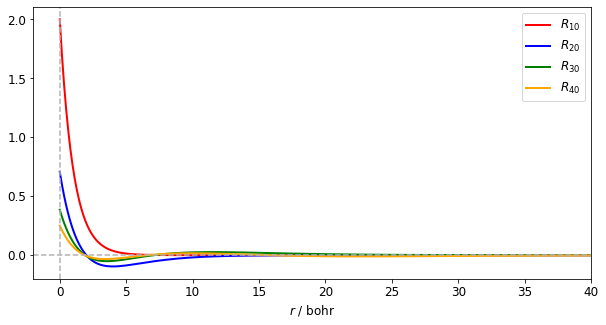

In [13]:
import matplotlib.pyplot as plt

R1 = R_nl(1, 0, r)
R2 = R_nl(2, 0, r)
R3 = R_nl(3, 0, r)
R4 = R_nl(4, 0, r)
_R1 = sym.lambdify([r],R1) 
_R2 = sym.lambdify([r],R2)
_R3 = sym.lambdify([r],R3)
_R4 = sym.lambdify([r],R4)

_r = np.linspace(0.,40.,250) # r from 0.0 to 40.0, 250 points
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_r, _R1(_r),linewidth=2,color='red',label="$R_{10}$")
plt.plot(_r, _R2(_r),linewidth=2,color='blue',label="$R_{20}$")
plt.plot(_r, _R3(_r),linewidth=2,color='green',label="$R_{30}$")
plt.plot(_r, _R4(_r),linewidth=2,color='orange',label="$R_{40}$")
plt.axhline(y = 0, color = '0.7',linestyle='--') # horizontal line
plt.axvline(x = 0, color = '0.7',linestyle='--') # vertical line
plt.xlim(-2,40) # x axis range from -2 to 40
plt.xlabel("$r$ / bohr")
plt.legend()
plt.show()



<div class="exE">

Plot the probability distributions $P_{n0}(r)$  of the four most stable $ns$ AOs between 0 and 40 bohr

</div>

(-2.0, 40.0)

Text(0.5, 0, '$r$ / bohr')

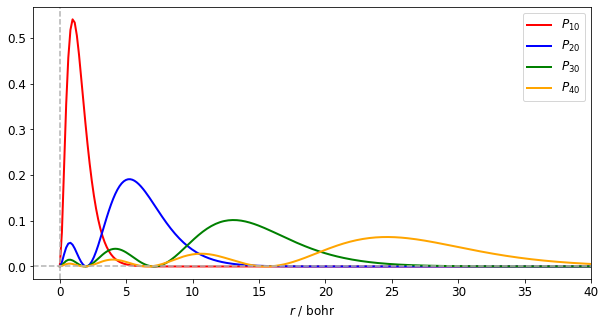

In [14]:
P1 = (R1*r)**2
P2 = (R2*r)**2
P3 = (R3*r)**2
P4 = (R4*r)**2
_P1 = sym.lambdify([r],P1) 
_P2 = sym.lambdify([r],P2)
_P3 = sym.lambdify([r],P3)
_P4 = sym.lambdify([r],P4)

_r = np.linspace(0.,40.,250)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_r, _P1(_r),linewidth=2,color='red',label="$P_{10}$")
plt.plot(_r, _P2(_r),linewidth=2,color='blue',label="$P_{20}$")
plt.plot(_r, _P3(_r),linewidth=2,color='green',label="$P_{30}$")
plt.plot(_r, _P4(_r),linewidth=2,color='orange',label="$P_{40}$")
plt.axhline(y = 0, color = '0.7',linestyle='--')
plt.axvline(x = 0, color = '0.7',linestyle='--')
plt.xlim(-2,40)
plt.xlabel("$r$ / bohr")
plt.legend()
plt.show()


<div class="exE">

Comments?

</div>

#### Calculation of the average position of the electron... and more

<div class="exE">

- calculate $\left<r\right>$ and $\sigma_r$ for the 10 most stable subshells, where $\sigma_r = \sqrt{\left<r^2\right> - \left<r\right>^2}$, the standard deviation of $r$, is the square root of the variance of $r$
- write down the result concisely, such as: `Subshell 1s. E = -13.598 eV. <r> = 3/2 ± sqrt(3)/2 = 1.5 ± 0.9`

</div>

In [44]:
# Average position: <f|r|f>

def expect(f,x): # <f|x|f>
    e = sym.integrate(f*x*sym.conjugate(f)*r**2, (r,0,+oo))
    return e

def std_dev(f,x):
    e1 = expect(f,x)
    e2 = expect(f,x**2)
    dev = sqrt(e2 - e1**2)
    return dev

# Construct nabla2(f)
def nabla2_r(f):
    # Calculate partial derivative and 2nd order partial derivative
    r_der = sym.diff(f,r)
    r_der2 = sym.diff((r**2*r_der),r)
    return 1/r**2 * r_der2

# Define H(f)
def H_r(f):
    return -1/(2*mu/me)*nabla2(f) - 1/r*f

# Define norm(f)
# Suppose <f|f*> = N, then normlized f' should be f/sqrt(<f|f*>)
def norm_r(f):
    f_int = sym.integrate(f*sym.conjugate(f)*r**2, (r,0,+oo))
    return f/sqrt(f_int)

# Define En
def En_r(f):
    f = norm_r(f) # Normalization
    return sym.integrate(sym.conjugate(f)*H_r(f)*r**2,(r,0,+oo)).evalf() # <f*|H|f> = <f*|Hf>

expc_list = []
dev_list = []

for n in range(1,5):
    for l in range(0,n):
        R = R_nl(n,l, r)
        E = En_r(R)*h2eV
        r_expc = expect(R,r)
        r_dev = std_dev(R,r)
        expc_list.append(float(r_expc.evalf()))
        dev_list.append(float(r_dev.evalf()))
        print(f"Subshell {n}{shl_sym[l]}. E = {E:.3f} eV.")
        print(f"<r> = {r_expc} ± {r_dev} = {r_expc.evalf():.1f} ± {r_dev.evalf():.1f}")
            


Subshell 1s. E = -13.598 eV.
<r> = 3/2 ± sqrt(3)/2 = 1.5 ± 0.9
Subshell 2s. E = -3.400 eV.
<r> = 6 ± sqrt(6) = 6.0 ± 2.4
Subshell 2p. E = -5.668 eV.
<r> = 5 ± sqrt(5) = 5.0 ± 2.2
Subshell 3s. E = -1.511 eV.
<r> = 27/2 ± 3*sqrt(11)/2 = 13.5 ± 5.0
Subshell 3p. E = -2.183 eV.
<r> = 25/2 ± sqrt(95)/2 = 12.5 ± 4.9
Subshell 3d. E = -2.721 eV.
<r> = 21/2 ± 3*sqrt(7)/2 = 10.5 ± 4.0
Subshell 4s. E = -0.850 eV.
<r> = 24 ± 6*sqrt(2) = 24.0 ± 8.5
Subshell 4p. E = -1.133 eV.
<r> = 23 ± sqrt(71) = 23.0 ± 8.4
Subshell 4d. E = -1.360 eV.
<r> = 21 ± 3*sqrt(7) = 21.0 ± 7.9
Subshell 4f. E = -1.579 eV.
<r> = 18 ± 6 = 18.0 ± 6.0


<div class="exE">

Plot again the probability distributions $P_{n0}(r)$  of the four most stable $ns$ AOs between 0 and 40 bohr, and add $\left<r\right>$ and $\sigma_r$ on the plot. The expected resulting figure is:

<p style="text-align:center;"><img width="700" src = "./FiguresCreatedInNotebooks/Pn0-HydrogenAtom-C.png"/></p>
</div>

(-2.0, 40.0)

Text(0.5, 0, '$r$ / bohr')

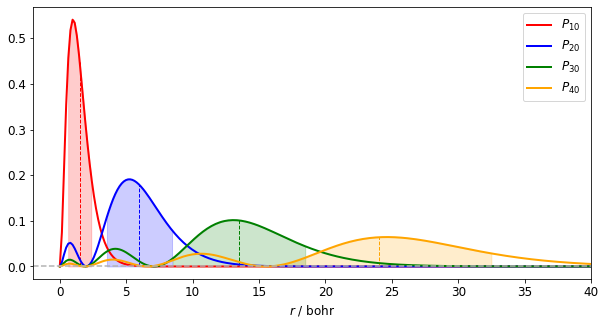

In [55]:
_r = np.linspace(0.,40.,250)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_r, _P1(_r),linewidth=2,color='red',label="$P_{10}$")
_r1 = np.linspace(expc_list[0] - dev_list[0],expc_list[0] + dev_list[0],250)
plt.fill_between(_r1, _P1(_r1), alpha = 0.2, color = 'red')
plt.vlines(x = expc_list[0], ymin=0, ymax=_P1(expc_list[0]), color = 'red',linewidth=1, linestyle='--')
plt.plot(_r, _P2(_r),linewidth=2,color='blue',label="$P_{20}$")
_r2 = np.linspace(expc_list[1] - dev_list[1],expc_list[1] + dev_list[1],250)
plt.fill_between(_r2, _P2(_r2), alpha = 0.2, color = 'blue')
plt.vlines(x = expc_list[1], ymin=0, ymax=_P2(expc_list[1]), color = 'blue',linewidth=1, linestyle='--')
plt.plot(_r, _P3(_r),linewidth=2,color='green',label="$P_{30}$")
_r3 = np.linspace(expc_list[3] - dev_list[3],expc_list[3] + dev_list[3],250)
plt.fill_between(_r3, _P3(_r3), alpha = 0.2, color = 'green')
plt.vlines(x = expc_list[3], ymin=0, ymax=_P3(expc_list[3]), color = 'green',linewidth=1, linestyle='--')
plt.plot(_r, _P4(_r),linewidth=2,color='orange',label="$P_{40}$")
_r4 = np.linspace(expc_list[6] - dev_list[6],expc_list[6] + dev_list[6],250)
plt.fill_between(_r4, _P4(_r4), alpha = 0.2, color = 'orange')
plt.vlines(x = expc_list[6], ymin=0, ymax=_P4(expc_list[6]), color = 'orange',linewidth=1, linestyle='--')
plt.axhline(y = 0, color = '0.7',linestyle='--')
plt.xlim(-2,40)
plt.xlabel("$r$ / bohr")
plt.legend()
plt.show()



<div class="exE">

Comments?

</div>

#### Angular part of the H wavefunctions

<div class="exE">
    
Use the `plot3DSC` function of the [pCAS.ipynb notebook](pCAS.ipynb) to plot the angular part of the $3d_{x^2-y^2}$ AO of the hydrogen atom, defined by the quantum numbers $n=3$, $\ell=2$, $m=\pm 2$

</div>

In [17]:
# insert your code here



# End

In [18]:
vID.end(cwd0)

**End at:** Saturday 23 September 2023, 21:21:37  
**Duration:** 00:00:19 776ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>